<a href="https://colab.research.google.com/github/Blurr99/tensorflow_deepLearning/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

This notebook is going to explore how to write neural networks for classification problems.

A classification  is where you try to classify something as one thing or another.

Few types of Classification problems:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Creating data to view and fit

In [75]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)


In [76]:
# Check out the features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [77]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Visualizing the data

In [78]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


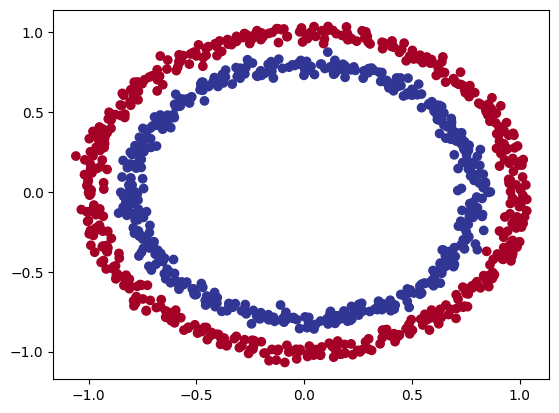

In [79]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.RdYlBu);

## Input and Output shapes

In [80]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [81]:
# How many samples?
len(X), len(y)

(1000, 1000)

In [82]:
# Viewing an example of features and labels
X[5], y[5]

(array([-0.47964637,  0.67643477]), 1)

## Steps in modelling:
1. Create a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Re-evaluate

In [83]:
import tensorflow as tf

# Setup a random seed
tf.random.set_seed(42)

# Creating a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compiling the model
model_1.compile(loss = tf.keras.losses.binary_crossentropy,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["accuracy"])

# Fitting the model
model_1.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 1.8012 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7223 - accuracy: 0.4870
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7024 - accuracy: 0.4940
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.4930
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.4810


In [84]:
# Trying to improve the model by training longer
model_1.fit(X, y, epochs = 200, verbose = 0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

### Since the problem is of binary classification and the model accuracy is around 50%, the model is working as if it is just guessing.

Adding another hidden layer

In [85]:
# Setup the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

# 3. Fitting the model
model_2.fit(X, y, epochs = 100, verbose = 0)

In [86]:
# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

## Improving the model

1. Create a model - can add more layers or increase the number of hidden units per layer.
2. Compile the model - might want to choose a different optimizer ssuch as Adam instead of SGD.
3. Fit the model - might want to fit the model for more epochs

In [87]:
# Setup the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# 3. Fitting the model
model_3.fit(X, y, epochs = 100, verbose = 0)

In [88]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.5110


[0.6958633661270142, 0.5109999775886536]

Creating a function `plot_decision_boundary()` to visualize the model's predictions.

The function will:
* Take in a trained model, features(X), and labels(y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [89]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
    Plots the decision boundary created by a model predicting on X.
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() -0.1, X[:, 0].max() +0.1
  y_min, y_max = X[:, 1].min() -0.1, X[:, 1].max()+ 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")
    # Need to reshape the predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)

  else:
    print("Doing Binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred,cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
Doing Binary classification


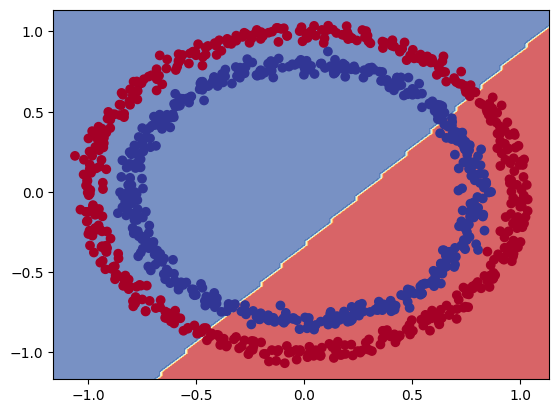

In [90]:
# Check out the predictions the model is making
plot_decision_boundary(model_3,
                       X, y)

In [91]:
# Checking if this model works for regresison problems

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x + 100

# Split the data into training and testing data
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis = -1), y_reg_train, epochs = 100)

Epoch 1/100


ValueError: ignored

The model doesnt work since the model was compiled for a binary classification problem.

In [92]:
# Setup the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

# 3. Fitting the model
model_3.fit(tf.expand_dims(X_reg_train, axis = -1), y_reg_train, epochs = 100, verbose = 0)

2/2 [==============================] - 0s 6ms/step


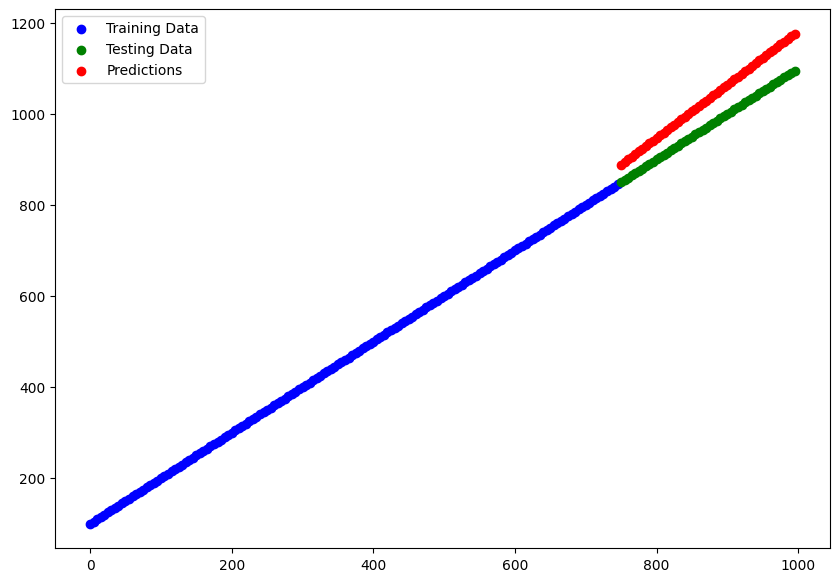

In [93]:
# Make predictions with the trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against the regression data
plt.figure(figsize = (10,7))
plt.scatter(X_reg_train, y_reg_train, c = "b", label = "Training Data")
plt.scatter(X_reg_test, y_reg_test, c = "g", label = "Testing Data")
plt.scatter(X_reg_test, y_reg_preds, c = "r", label = "Predictions")
plt.legend();

## Trying to add Non Linearity

In [94]:
# Trying a linear activation function

#Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation= tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ["accuracy"])

# 3. Fit the mode
history = model_4.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.8332 - accuracy: 0.4870
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8286 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7634 - accuracy: 0.4870
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6862 - accuracy: 0.4850
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6148 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5894 - accuracy: 0.4830
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 5.5784 - accuracy: 0.4820
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5547 - accuracy: 0.4760
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 5.5375 - accuracy: 0.4780
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 5.5004 - accuracy: 0.4800
Epoch 11/

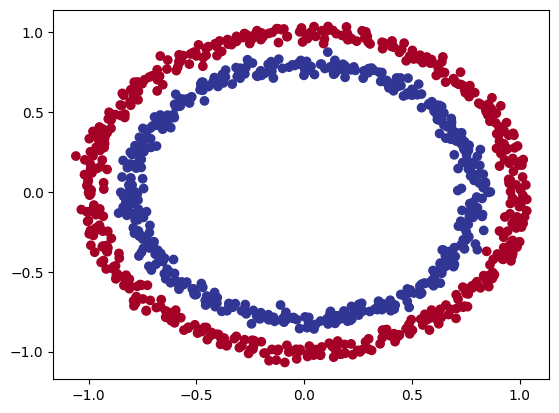

In [95]:
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.RdYlBu);

313/313 [==============================] - 1s 2ms/step
Doing Binary classification


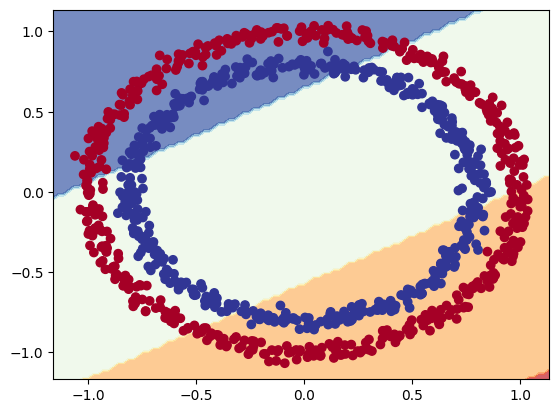

In [96]:
# Check the decision boundary for our latest model
plot_decision_boundary(model_4, X, y)

Trying out non-linear activation functions

In [97]:
#Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation= tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ["accuracy"])

# 3. Fit the mode
history = model_5.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.9333 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9299 - accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9259 - accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9247 - accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9235 - accuracy: 0.4840
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9224 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9128 - accuracy: 0.4830
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8888 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8853 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 5.8838 - accuracy: 0.4850
Epoch 11/

313/313 [==============================] - 0s 1ms/step
Doing Binary classification


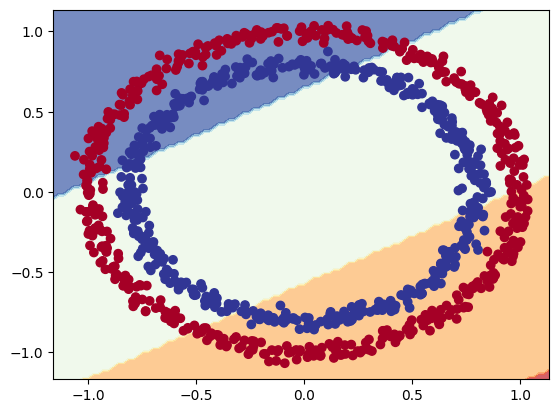

In [98]:
plot_decision_boundary(model_4, X, y)

In [99]:
# Setup the random seed
tf.random.set_seed(42)

# 1. Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [100]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 1s 2ms/step
Doing Binary classification


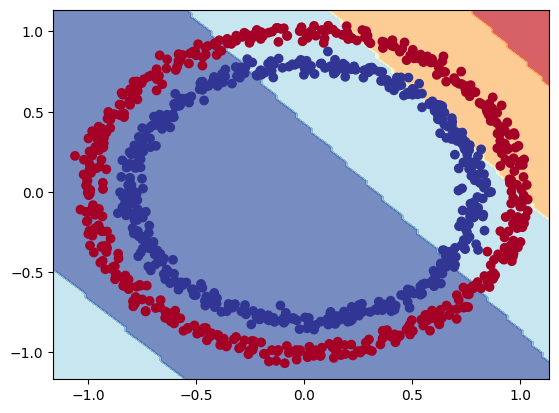

In [101]:
plot_decision_boundary(model_6, X, y)

In [102]:
# Making a model with an activatin function in the output layer

 # Setup the random seed
tf.random.set_seed(42)

 # 1. Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(1, activation = "sigmoid")
])

# 2. Compile the model
model_7.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                metrics = ["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 0.7153 - accuracy: 0.4990
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7078 - accuracy: 0.5010
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7034 - accuracy: 0.4890
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7008 - accuracy: 0.4900
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6989 - accuracy: 0.4510
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6973 - accuracy: 0.4350
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6958 - accuracy: 0.4420
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.4540
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4570
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.4430
Epoch 11/

313/313 [==============================] - 1s 2ms/step
Doing Binary classification


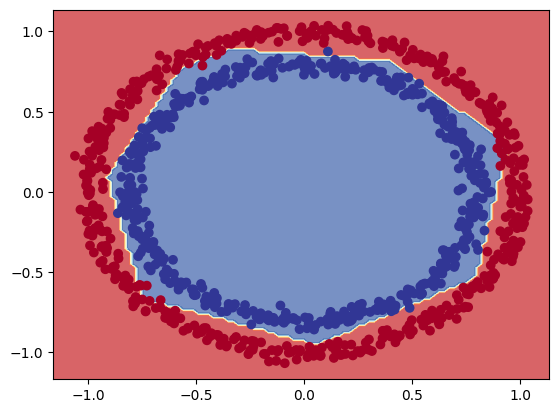

In [103]:
plot_decision_boundary(model_7, X, y)

The combination of linear (straight lines) and non-linear (non-straight lines) functions is one of the key fundamentals of neural networks.

In [104]:
A = tf.cast(tf.range(-10,10), dtype = tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

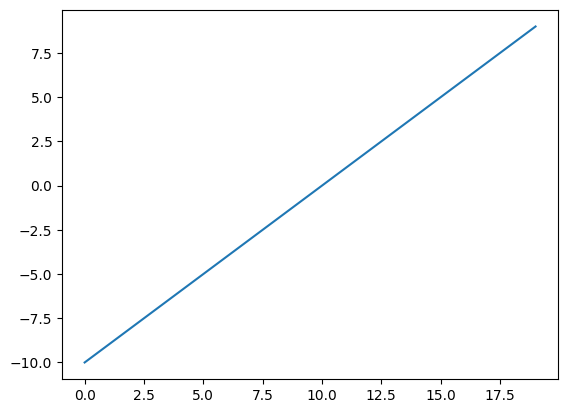

In [105]:
plt.plot(A);

In [106]:
# Re creating the sigmoid function
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

In [107]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

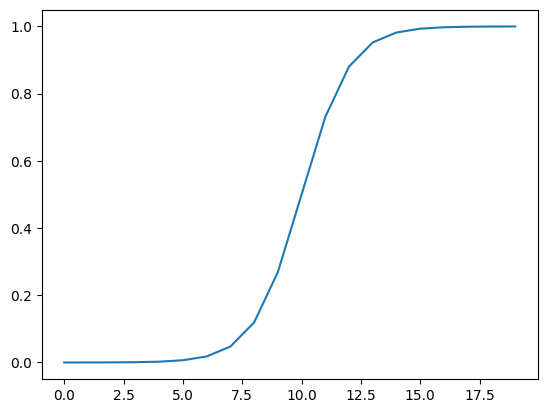

In [108]:
plt.plot(sigmoid(A))

In [109]:
# Recreating the relu function
def relu(x):
  return tf.maximum(0, x)

In [110]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

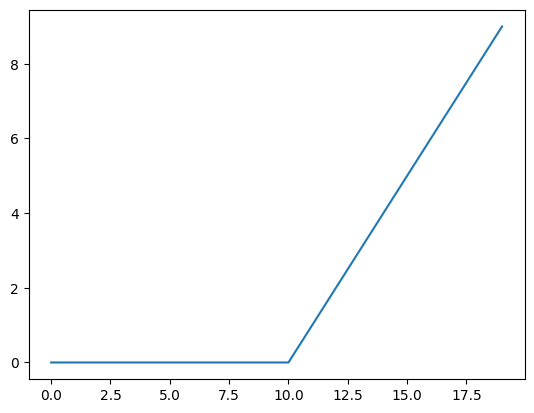

In [111]:
plt.plot(relu(A))

## Evaluating and improving the mode.

Splitting the data into train and test splits for training and testing on different data

In [112]:
# Split into train and test split
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [113]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [114]:
# Recreating a model to fit on training data and evaluating on test data

# Set a random seed
tf.random.set_seed(42)

# 1. Create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# 2. Compile the model
model_8.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])

# 3. Fitting the model
history = model_8.fit(X_train, y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6933 - accuracy: 0.5025
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.5100
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.5213
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6827 - accuracy: 0.5600
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6793 - accuracy: 0.5450
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6750 - accuracy: 0.5462
Epoch 7/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6680 - accuracy: 0.5750
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6618 - accuracy: 0.5750
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6475 - accuracy: 0.6413
Epoch 10/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6295 - accuracy: 0.6463
Epoch 11/25
25/25 [

In [115]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3824 - accuracy: 0.8250


[0.38238847255706787, 0.824999988079071]

313/313 [==============================] - 1s 2ms/step
Doing Binary classification
313/313 [==============================] - 1s 3ms/step
Doing Binary classification


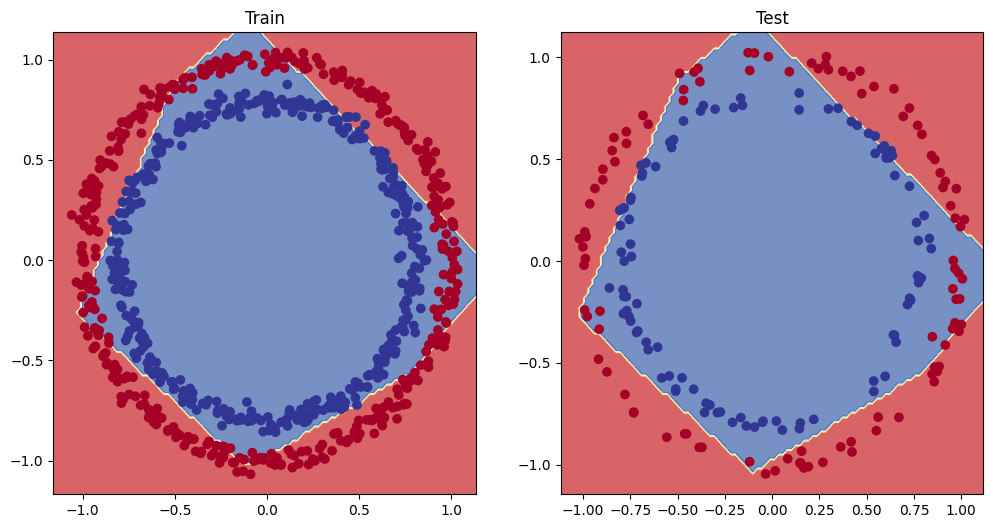

In [116]:
# Plotting the decision boundary for train annd test sets

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)

## Plotting the loss (or training) curves

In [117]:
# Converting the history into a Pandas DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.693284,0.50250
1,0.689875,0.51000
2,0.685803,0.52125
3,0.682742,0.56000
4,0.679287,0.54500
5,0.675007,0.54625
6,0.667988,0.57500
7,0.661824,0.57500
8,0.647454,0.64125
9,0.629506,0.64625


Text(0.5, 1.0, 'Model_8 loss curve')

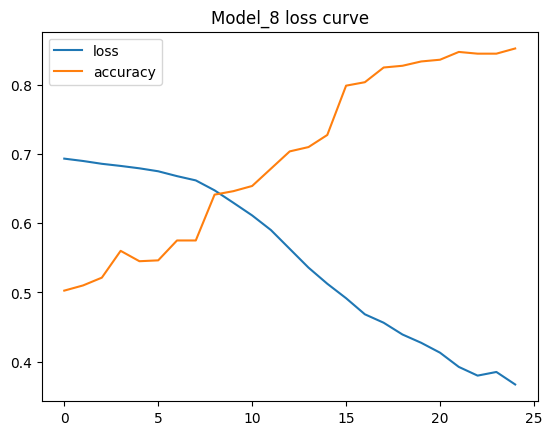

In [118]:
# Plotting the loss
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curve")

## Finding the best learning rate

To find the best learning rate, the following steps are needed:
* A learning rate callback
* Another model
* A modified loss curves plot.

In [119]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_9.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                metrics = ["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history = model_9.fit(X_train, y_train, epochs = 100, callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7033 - accuracy: 0.5050 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7023 - accuracy: 0.5063 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7012 - accuracy: 0.5063 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.5100 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6989 - accuracy: 0.5113 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6977 - accuracy: 0.5113 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.5138 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.5113 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

In [120]:
# Check the history
pd.DataFrame(history.history)

,loss,accuracy,lr
0,0.703333,0.50500,0.000100
1,0.702287,0.50625,0.000112
2,0.701160,0.50625,0.000126
3,0.700068,0.51000,0.000141
4,0.698929,0.51125,0.000158
...,...,...,...
95,0.773911,0.46375,5.623413
96,0.801670,0.50125,6.309574
97,0.957542,0.49625,7.079458
98,0.934760,0.49125,7.943282


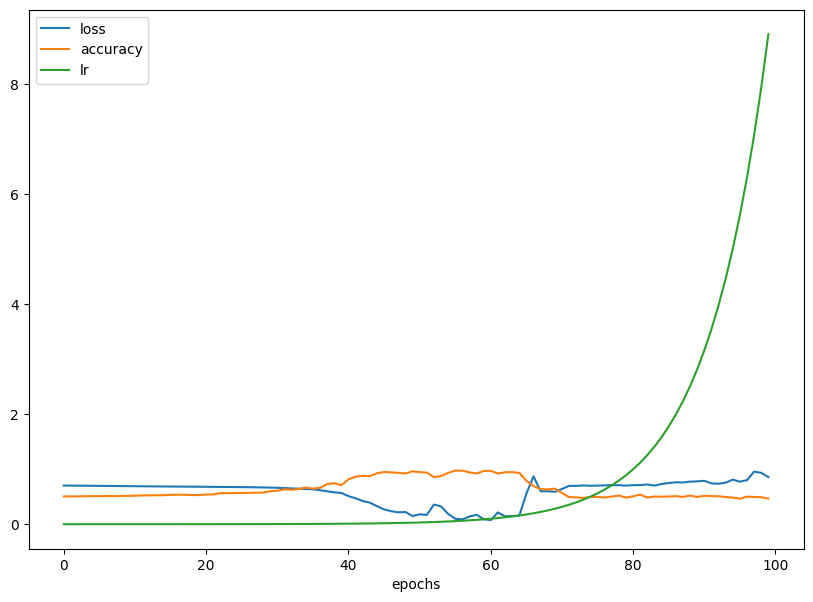

In [121]:
pd.DataFrame(history.history).plot(figsize = (10,7),xlabel = "epochs");

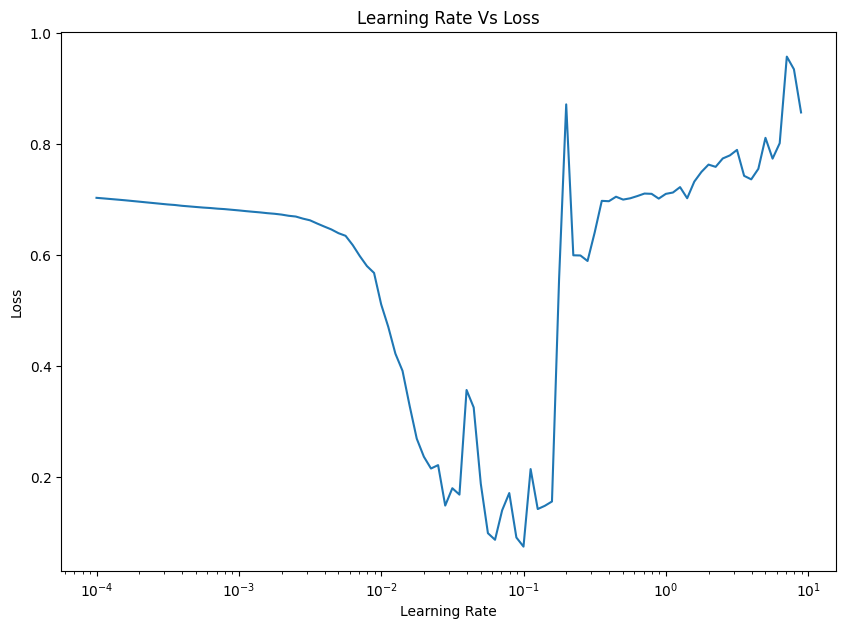

In [122]:
# Plot the learning rate versus loss
lrs = 1e-4 * (10 ** (tf.range(100) / 20))
plt.figure(figsize = (10,7))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate Vs Loss");

In [123]:
# Trying a higher learning rate

# Setup a random seed
tf.random.set_seed(42)

# 1. Create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# 2. Compile the model
model_10.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
                metrics = ["accuracy"])

# 3. Fit the model for 20 epochs (5 less than before)
model_10.fit(X_train, y_train, epochs = 20)

Epoch 1/20
25/25 [==============================] - 1s 5ms/step - loss: 0.6902 - accuracy: 0.5375
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6778 - accuracy: 0.5587
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6640 - accuracy: 0.5775
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6471 - accuracy: 0.6137
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6324 - accuracy: 0.6538
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6084 - accuracy: 0.6963
Epoch 7/20
25/25 [==============================] - 0s 5ms/step - loss: 0.5947 - accuracy: 0.6913
Epoch 8/20
25/25 [==============================] - 0s 5ms/step - loss: 0.5415 - accuracy: 0.7437
Epoch 9/20
25/25 [==============================] - 0s 5ms/step - loss: 0.5003 - accuracy: 0.7887
Epoch 10/20
25/25 [==============================] - 0s 5ms/step - loss: 0.4514 - accuracy: 0.8188
Epoch 11/20
25/25 [

In [124]:
# Evaluating model 10 on the test data
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1910 - accuracy: 0.9350


[0.19101232290267944, 0.9350000023841858]

In [125]:
# Evaluate model 8 on test data
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3824 - accuracy: 0.8250


[0.38238847255706787, 0.824999988079071]

313/313 [==============================] - 1s 2ms/step
Doing Binary classification
313/313 [==============================] - 1s 2ms/step
Doing Binary classification


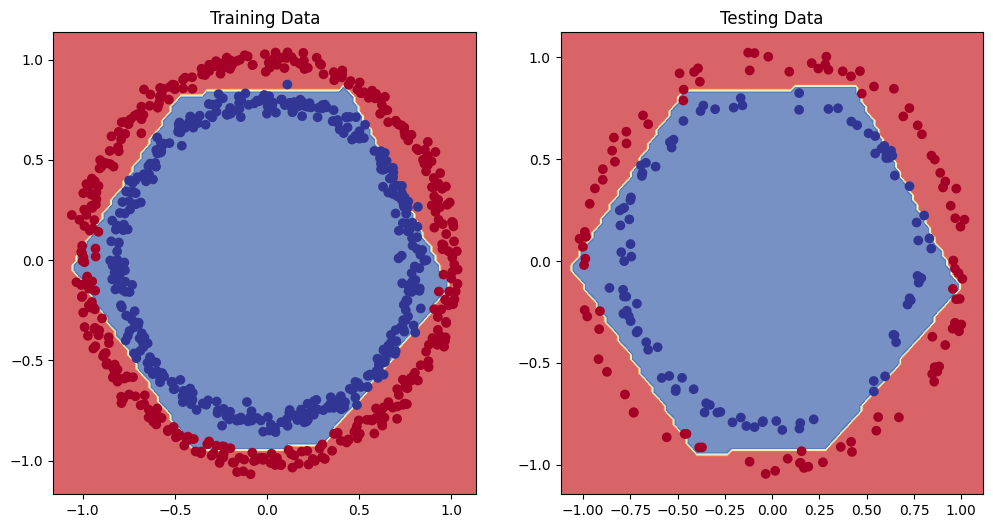

In [126]:
# PLot the decision boundaries for the training and testing sets on model 10
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Training Data")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Testing Data")
plot_decision_boundary(model_10, X_test, y_test)

## More classification evaluation methods

Alongside visualizing our models results as much  as possible, there are a handful of other classification evaluation metrics.

* Accuracy
* Precision
* Recall
* F1 Score
* Confusion Matrix
* Classification Report (Scikit Learn)

In [127]:
# Check the accuracy of the model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.1910 - accuracy: 0.9350
Model loss on the test set: 0.19101232290267944
Model accuracy on the test set: 93.50%


## Confusion Matrix

In [128]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 3ms/step


ValueError: ignored

In [129]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [130]:
y_preds[:10]

array([[0.5969145 ],
       [0.903302  ],
       [0.903302  ],
       [0.903302  ],
       [0.3851536 ],
       [0.32765317],
       [0.75311685],
       [0.05502924],
       [0.7932981 ],
       [0.00251914]], dtype=float32)

Doesnt work since the predicted values are **prediction probabilities** and not 0s or 1s

In [131]:
# COnverting the prediction probabilities to binary format
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [132]:
y_preds = tf.round(y_preds)

In [133]:
confusion_matrix(y_test, tf.round(y_preds))

array([[92,  9],
       [ 4, 95]])

In [134]:
y_preds = model_10.predict(X_test)

7/7 [==============================] - 0s 2ms/step


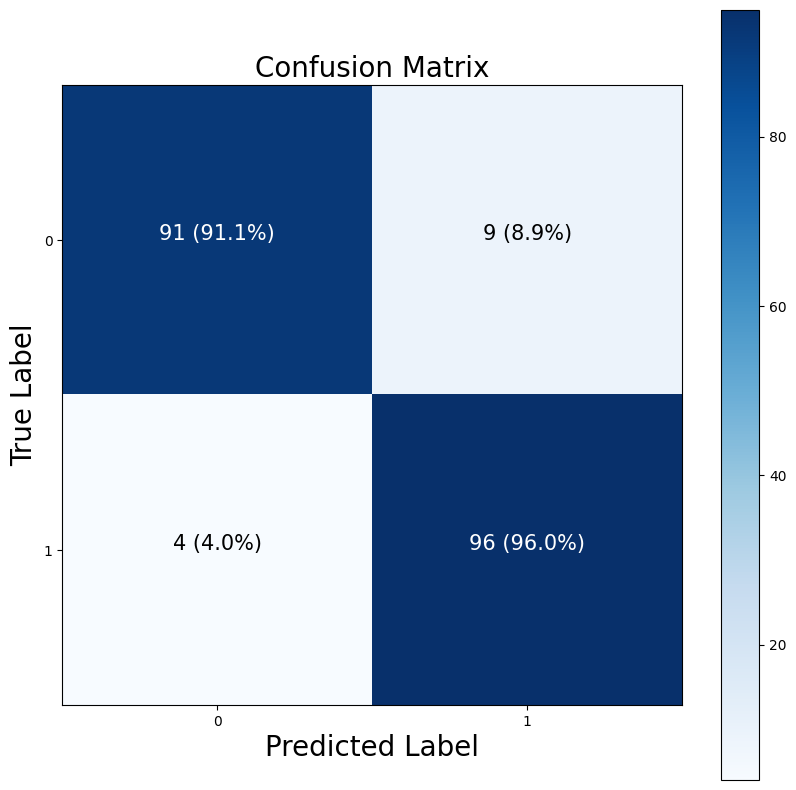

In [135]:
# Using scikit learn's plot_confusion_matrix
import itertools

figsize = (10,10)

# Create a confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis] # Normalize the confusion matrix
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize = figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axis
ax.set(title = "Confusion Matrix",
       xlabel = "Predicted Label",
       ylabel = "True Label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# Set the x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust the label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the confusion matrix
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm_norm[i, j]* 100 :.0f} ({cm_norm[i, j]* 100 :.1f}%)", horizontalalignment = "center",
           color = "white" if cm[i, j] > threshold else "black",
           size = 15)

# Working with a larger classification (Multiclass classification)

When there are more than two clases, its known as multiclass Classiication

In [138]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [139]:
# Viewing the first sample
print(f"Training Sample: \n {train_data[0]}\n")
print(f"Training Label: \n {train_labels[0]}\n")

Training Sample: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [142]:
# Shape of the data
train_data[0].shape, train_labels[0].shape

((28, 28), ())

2


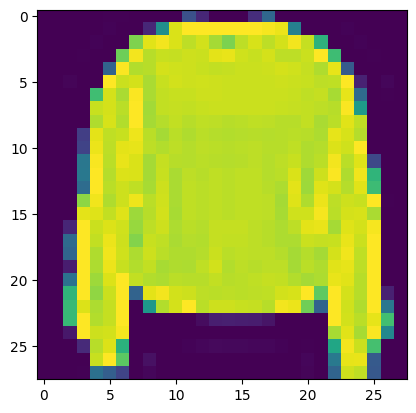

In [144]:
import matplotlib.pyplot as plt

plt.imshow(train_data[7])
print(train_labels[7])

In [150]:
# Creating a list so that training labels can be indexed so theyre human read-able
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Coat')

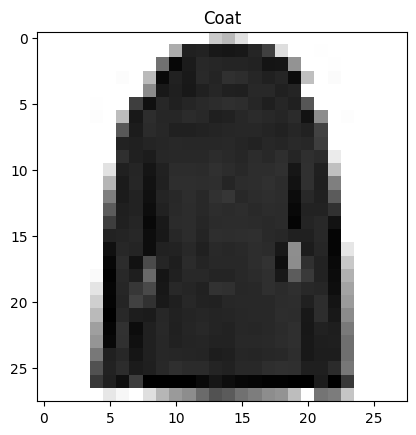

In [154]:
# Plot an example image and its label
index_of_data = 2000
plt.imshow(train_data[index_of_data], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index_of_data]])

In [174]:
# Plot multiple random images of fashion MNIST
import random
def plot_random_4():
  plt.figure(figsize = (7,7))
  for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    random_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[random_index], cmap = plt.cm.binary)
    plt.axis(False)
    plt.title(class_names[train_labels[random_index]])

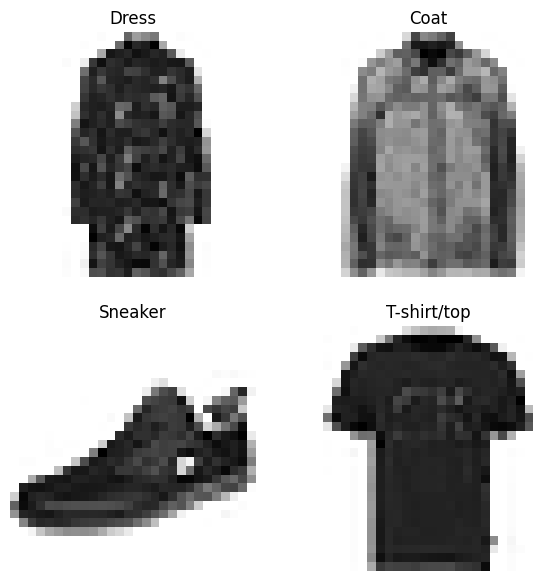

In [175]:
plot_random_4()

## Building a multiclass classification model

For multiclass classification model, similar architecture to the above binary classifier can be used, however, some things need to be tweaked:
* Input Shape = 28 x 28
* Output Shape = 10 (one per class of clothing)
* Loss function = if labels are one hot encoded, sue tf.keras.losses.CategoricalCrossentropy() and if theyre integers, use tf.keras.losses.SparseCategoricalCrossentropy()
* Output Layer activation = "softmax"

In [176]:
train_data[0].shape

(28, 28)

In [177]:
train_labels[0].shape

()

In [182]:
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28))
])

flatten_model.output_shape

(None, 784)

In [188]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# 2. Compile the model
model_11.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# 3. Fit the model
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth = 10),
                                epochs = 10,
                                validation_data = (test_data, tf.one_hot(test_labels, depth = 10)))

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 2.3179 - accuracy: 0.1020 - val_loss: 2.3000 - val_accuracy: 0.1443
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.0309 - accuracy: 0.2158 - val_loss: 1.7283 - val_accuracy: 0.2668
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.6546 - accuracy: 0.3074 - val_loss: 1.5588 - val_accuracy: 0.3436
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5421 - accuracy: 0.3511 - val_loss: 1.5094 - val_accuracy: 0.3485
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.4806 - accuracy: 0.3617 - val_loss: 1.4797 - val_accuracy: 0.3586
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4698 - accuracy: 0.3567 - val_loss: 1.4600 - val_accuracy: 0.3707
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.4488 - accuracy: 0.3581 - val_loss: 1.4420 - val_accuracy

In [189]:
# Check model summary
model_11.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_79 (Dense)            (None, 4)                 3140      
                                                                 
 dense_80 (Dense)            (None, 4)                 20        
                                                                 
 dense_81 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [190]:
# Checking the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural Networks prefer data to be scaled (or normalized), this means they like to have numbers in the tensors they try to find patterns in between 0 and 1.

In [192]:
# We can get the train and test data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.
test_data_norm = test_data / 255.

# Check min and max values of scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [200]:
# Building a new model using the new normalized train and test data

# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# 2. Compile the model
model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# 3. Fit the model
norm_history = model_12.fit(train_data_norm,
                train_labels,
                epochs = 10,
                validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.4802 - accuracy: 0.3992 - val_loss: 1.2356 - val_accuracy: 0.5004
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1464 - accuracy: 0.5314 - val_loss: 1.0772 - val_accuracy: 0.5845
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0067 - accuracy: 0.6190 - val_loss: 0.9671 - val_accuracy: 0.6598
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9177 - accuracy: 0.6576 - val_loss: 0.9094 - val_accuracy: 0.6738
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8706 - accuracy: 0.6690 - val_loss: 0.8730 - val_accuracy: 0.6798
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8447 - accuracy: 0.6725 - val_loss: 0.8563 - val_accuracy: 0.6729
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8307 - accuracy: 0.6733 - val_loss: 0.8598 - val_accuracy:

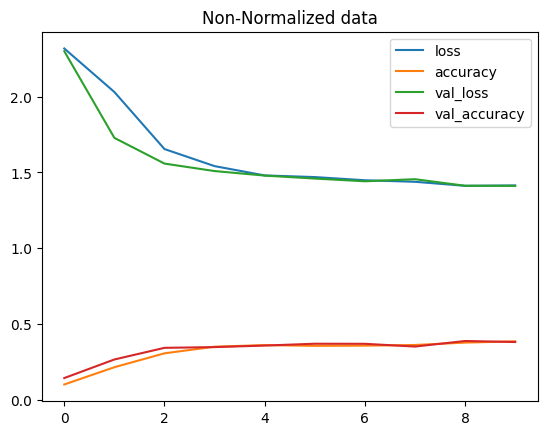

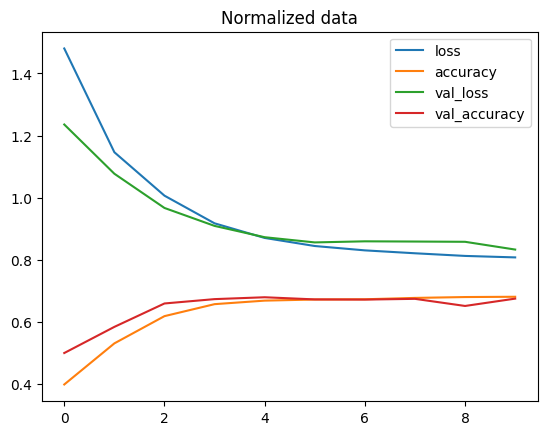

In [209]:
import pandas as pd

# Plot non_normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-Normalized data")

# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")
plt.legend()

## Finding the ideal learning rate

In [213]:
# Setup the random seed
tf.random.set_seed(42)

# 1. Create a model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# 2. Compile the model
model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                    train_labels,
                    epochs = 40,
                    validation_data = (test_data_norm, test_labels),
                    callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 11s 5ms/step - loss: 1.1502 - accuracy: 0.5561 - val_loss: 0.7706 - val_accuracy: 0.7213 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6756 - accuracy: 0.7687 - val_loss: 0.6527 - val_accuracy: 0.7812 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5914 - accuracy: 0.7974 - val_loss: 0.6003 - val_accuracy: 0.7962 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5564 - accuracy: 0.8080 - val_loss: 0.5842 - val_accuracy: 0.8000 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5401 - accuracy: 0.8122 - val_loss: 0.5683 - val_accuracy: 0.8060 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5276 - accuracy: 0.8169 - val_loss: 0.5823 - val_accuracy: 0.8014 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 8

Text(0.5, 1.0, 'Finding the ideal Learning Rate')

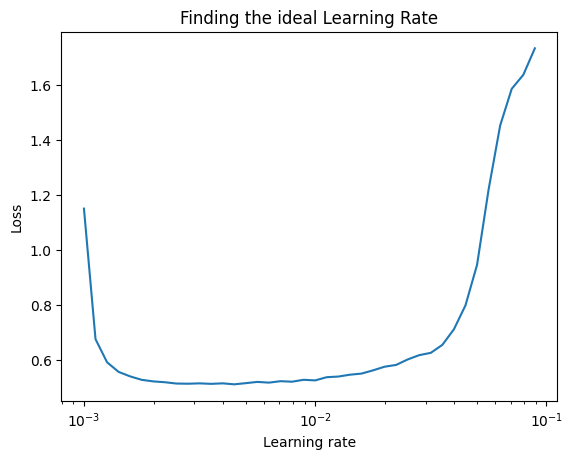

In [215]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 ** (tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal Learning Rate")

In [216]:
# Recreating a model with the Ideal Learning rate (i.e. 1e-3)

# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# 2. Compile the model
model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                 metrics = ["accuracy"])

# 3. Fit the model
history_14 = model_14.fit(train_data_norm,
             train_labels,
             epochs = 20,
             validation_data = (test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 10s 4ms/step - loss: 1.2576 - accuracy: 0.5797 - val_loss: 0.9614 - val_accuracy: 0.6599
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8692 - accuracy: 0.6791 - val_loss: 0.8465 - val_accuracy: 0.6868
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7740 - accuracy: 0.7194 - val_loss: 0.7783 - val_accuracy: 0.7241
Epoch 4/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6997 - accuracy: 0.7550 - val_loss: 0.7007 - val_accuracy: 0.7596
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6604 - accuracy: 0.7715 - val_loss: 0.7172 - val_accuracy: 0.7542
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6363 - accuracy: 0.7793 - val_loss: 0.6824 - val_accuracy: 0.7669
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6224 - accuracy: 0.7816 - val_loss: 0.6703 - val_accuracy

## Evaluating a multiclass classification model

To evaluate a multiclass classification model, the following steps could be employed:
* Evaluate its performance using other classification metrics (such as confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing its architecture)
* Save and export it for use in application

In [219]:
# Create a confusion matrix

def make_confusion_matrix(y_true, y_pred, classes = None, figsize = (10, 10), text_size = 15):

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis] # Normalize the confusion matrix
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize = figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axis
  ax.set(title = "Confusion Matrix",
        xlabel = "Predicted Label",
        ylabel = "True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  # Set the x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust the label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the confusion matrix
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, f"{cm_norm[i, j]* 100 :.0f} ({cm_norm[i, j]* 100 :.1f}%)", horizontalalignment = "center",
            color = "white" if cm[i, j] > threshold else "black",
            size = text_size)

In [226]:
y_probs = model_14.predict(test_data_norm)
y_probs

313/313 [==============================] - 1s 4ms/step


array([[7.75511027e-04, 4.53903749e-06, 7.10399298e-04, ...,
        1.78348497e-02, 8.42269743e-04, 2.70560592e-01],
       [1.72780819e-05, 9.17716470e-16, 8.89715493e-01, ...,
        0.00000000e+00, 3.41681321e-03, 0.00000000e+00],
       [4.50039894e-04, 9.97067034e-01, 1.34846792e-08, ...,
        2.31503066e-25, 5.81942524e-12, 4.78223301e-29],
       ...,
       [2.92186141e-02, 4.81077841e-05, 1.16208166e-01, ...,
        9.92885041e-14, 1.87583342e-01, 4.12223985e-19],
       [5.02454408e-04, 9.52503502e-01, 9.88015145e-08, ...,
        5.06044283e-17, 9.06746500e-09, 5.47751289e-24],
       [6.88502972e-04, 1.30365447e-06, 2.94155674e-03, ...,
        2.37170560e-03, 2.54077017e-02, 5.22895316e-05]], dtype=float32)

In [230]:
y_probs[0], class_names[tf.argmax(y_probs[0])], class_names[test_labels[0]]

(array([7.7551103e-04, 4.5390375e-06, 7.1039930e-04, 2.5709087e-04,
        5.9353893e-05, 7.0844102e-01, 5.1436934e-04, 1.7834850e-02,
        8.4226974e-04, 2.7056059e-01], dtype=float32),
 'Sandal',
 'Ankle boot')

In [232]:
# Convert all prediction probabilities into integers
y_preds = y_probs.argmax(axis = 1)

# View the first 10 prediction labels
y_preds[:10]

array([5, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [234]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_labels, y_preds)

array([[738,   2,  28, 101,   6,   3, 105,   0,  14,   3],
       [ 13, 914,   0,  62,   2,   0,   6,   0,   3,   0],
       [ 16,   0, 624,  17, 186,   2, 142,   0,  13,   0],
       [ 24,   7,   7, 824,  52,   1,  58,   2,  25,   0],
       [  1,   0, 102,  47, 743,   0,  95,   0,  12,   0],
       [  0,   0,   0,   0,   0, 917,   0,  37,   8,  38],
       [143,   0, 153,  81, 199,   9, 392,   2,  21,   0],
       [  0,   0,   0,   0,   0,  69,   0, 898,   1,  32],
       [  0,   0,  26,  15,  14,  19,   6,   5, 915,   0],
       [  0,   0,   0,   0,   0,  37,   0,  48,   0, 915]])

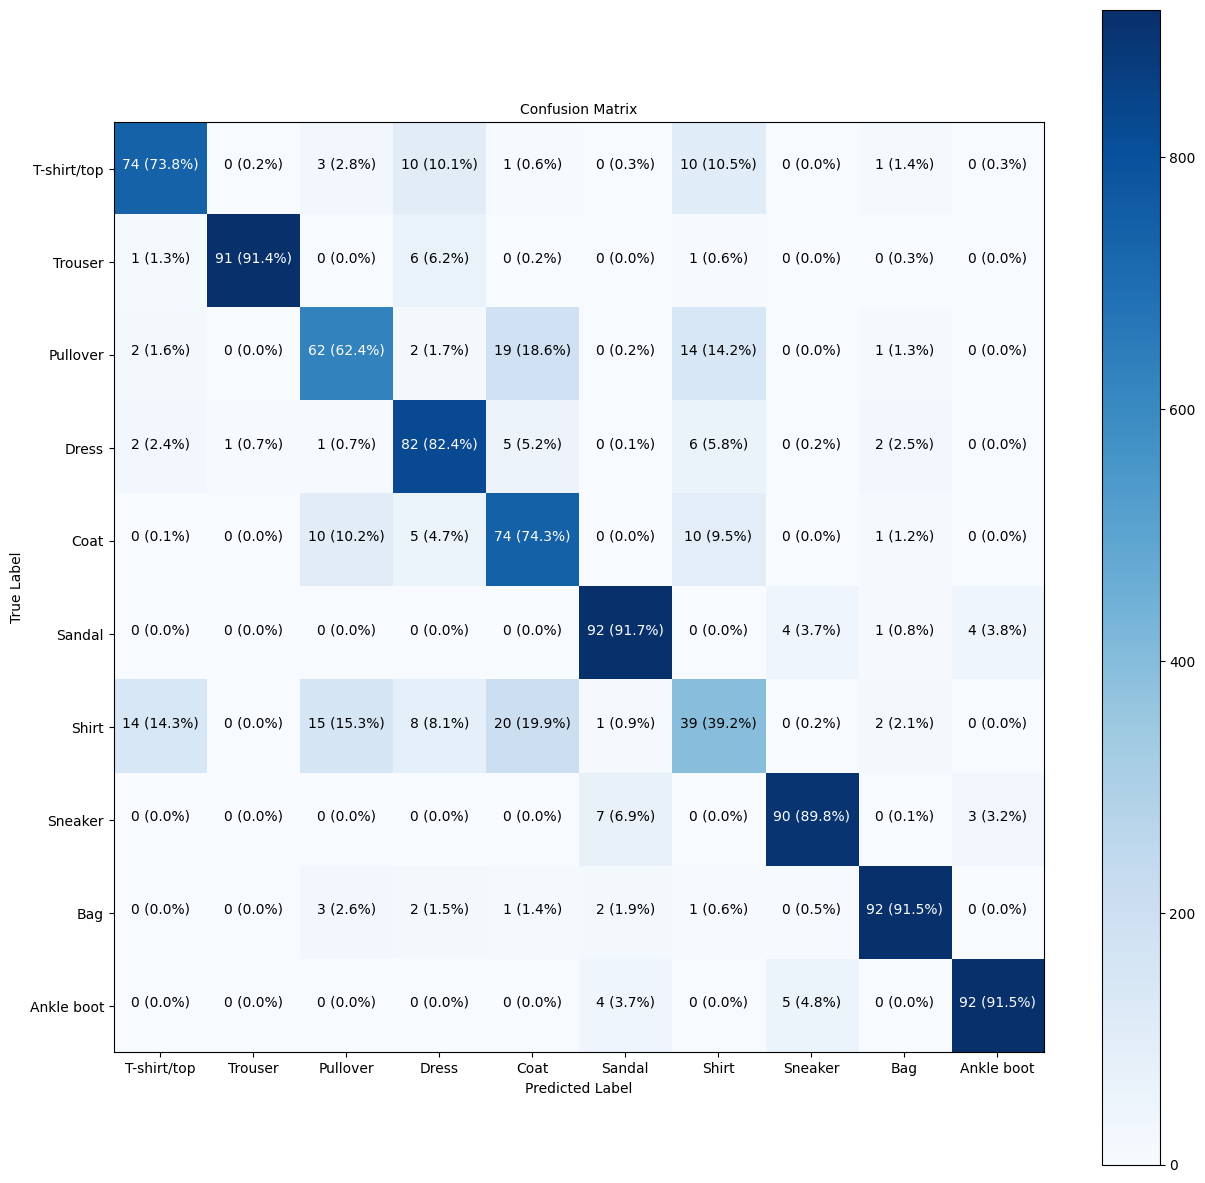

In [237]:
make_confusion_matrix(test_labels,
                      y_preds,
                      classes = class_names,
                      figsize = (15,15),
                      text_size = 10)

Creating a function that:
* Picks a random image
* Make a prediction on the picked image
* Label the plot with the predicted label and the true label

In [240]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
    Picks a random image, plots it and labels it with a prediction label and the true label
  """
  # Set up random number
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_prob = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_prob.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap = plt.cm.binary)

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information(prediction/true label)
  plt.xlabel("Pred: {} {:.2f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_prob),
                                                  true_label),
             color = color)

1/1 [==============================] - 0s 17ms/step


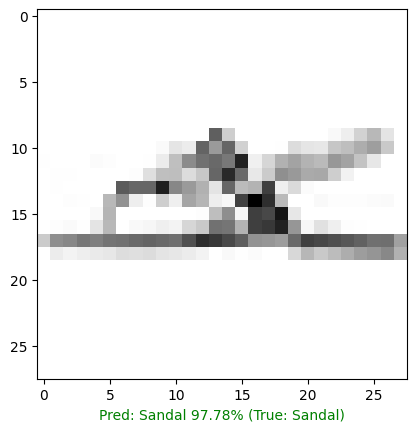

In [245]:
plot_random_image(model_14, test_data_norm, test_labels, class_names)

## What patterns does the model actually learn?

In [246]:
# Find the layers of the most recent model
model_14.layers

In [247]:
# Extract a particular layer
model_14.layers[1]

In [249]:
# Get the patterns of a layer in the network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.874719  ,  0.02210906, -0.01697904, -0.32454714],
        [ 0.07715669, -0.60438335,  0.02105557, -0.7446821 ],
        [ 0.5847057 , -0.96265495,  0.00883275, -0.53564066],
        ...,
        [-0.22048636, -0.517258  , -0.03672766,  0.3506099 ],
        [ 0.04857415, -0.29099074, -0.02701774, -0.06886055],
        [ 0.06382392, -0.6311685 ,  0.04478703, -0.22722039]],
       dtype=float32),
 (784, 4))

## Checking the bias vector

In [252]:
# Bias and bias shape
biases, biases.shape

(array([ 1.4905868 ,  1.4523432 , -0.02930621,  2.4803724 ], dtype=float32),
 (4,))

Every neuron has a bias vector, each of these is paired with a weights matrix.

The bias vector gets initialized as zeros (atleast in the case of a TensorFlow dense layer)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [253]:
model_14.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_109 (Dense)           (None, 4)                 3140      
                                                                 
 dense_110 (Dense)           (None, 4)                 20        
                                                                 
 dense_111 (Dense)           (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


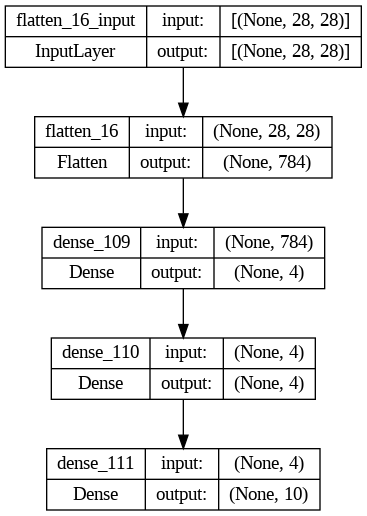

In [254]:
# Another way of viewing a deep learning model
from tensorflow.keras.utils import plot_model
# See the inputs and outputs os each layer
plot_model(model_14, show_shapes = True)